# Monte Carlo Analysis of LDPC Decoders

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulators import MonteCarloSimulator
from channels import BinarySymmetricChannel, BinaryAWGNChannel
from encoders import BasicEncoder
from decoders import Gallager, BeliefPropagation, MinSum
from utils import read_ldpc_graph

In [2]:
G = read_ldpc_graph('data/Tanner.dat')
encoder = BasicEncoder(G)

## Binary Symmetric Channel

In [3]:
alpha = np.linspace(0.01, 0.2, 20)
frame_error_rate = np.zeros((4, len(alpha)))
for i, a in enumerate(alpha):
    channel = BinarySymmetricChannel(alpha=a)
    simulator = MonteCarloSimulator(encoder, Gallager(G, variant='B'), channel)
    frame_error_rate[0, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, BeliefPropagation(G, channel), channel)
    frame_error_rate[1, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, MinSum(G), channel)
    frame_error_rate[2, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, MinSum(G, self_correcting=True), channel)
    frame_error_rate[3, i] = simulator.run(numtrials=int(1e3))

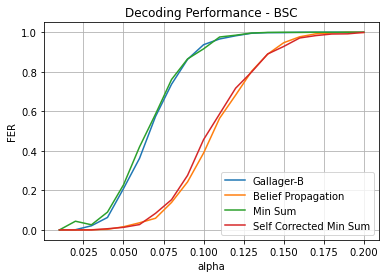

In [4]:
plt.plot(alpha, frame_error_rate[0, :], linewidth=1.5, label='Gallager-B')
plt.plot(alpha, frame_error_rate[1, :], linewidth=1.5, label='Belief Propagation')
plt.plot(alpha, frame_error_rate[2, :], linewidth=1.5, label='Min Sum')
plt.plot(alpha, frame_error_rate[3, :], linewidth=1.5, label='Self Corrected Min Sum')
plt.title('Decoding Performance - BSC')
plt.xlabel('alpha')
plt.ylabel('FER')
plt.grid(True)
plt.legend()

## Binary AWGN Channel

In [5]:
sigma = np.linspace(0.1, 2, 20)
frame_error_rate = np.zeros((4, len(sigma)))
for i, a in enumerate(sigma):
    channel = BinaryAWGNChannel(sigma=a)
    simulator = MonteCarloSimulator(encoder, Gallager(G, variant='B'), channel)
    frame_error_rate[0, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, BeliefPropagation(G, channel), channel)
    frame_error_rate[1, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, MinSum(G), channel)
    frame_error_rate[2, i] = simulator.run(numtrials=int(1e3))
    simulator = MonteCarloSimulator(encoder, MinSum(G, self_correcting=True), channel)
    frame_error_rate[3, i] = simulator.run(numtrials=int(1e3))

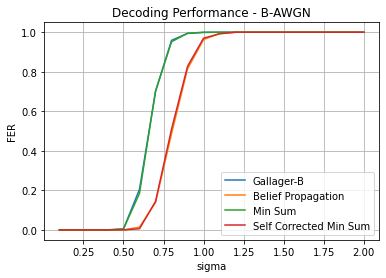

In [6]:
plt.plot(sigma, frame_error_rate[0, :], linewidth=1.5, label='Gallager-B')
plt.plot(sigma, frame_error_rate[1, :], linewidth=1.5, label='Belief Propagation')
plt.plot(sigma, frame_error_rate[2, :], linewidth=1.5, label='Min Sum')
plt.plot(sigma, frame_error_rate[3, :], linewidth=1.5, label='Self Corrected Min Sum')
plt.title('Decoding Performance - B-AWGN')
plt.xlabel('sigma')
plt.ylabel('FER')
plt.grid(True)
plt.legend()